# Building AI Applications using Python - Code Examples
Chapter 2 - Machine Learning & its Algorithms

##### Simple Linear Regression-Example 1

In [1]:
#Importing necessary packages

import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
#Defining a function for calculating values needed for Simple Linear Regression (SLR)

def coef_estimation(x, y): 
    n = np.size(x) #calculating number of observations ‘n’.
    mean_x, mean_y = np.mean(x), np.mean(y) #calculating mean of x and y vectors
    cross_xy = np.sum(y*x) - n*mean_y*mean_x #calculating cross-deviation and deviation about x.
    cross_xx = np.sum(x*x) - n*mean_x*mean_x 
    reg_b_1 = cross_xy / cross_xx #calculating regression coefficients i.e. b. 
    reg_b_0 = mean_y - reg_b_1*mean_x 
    return(reg_b_0, reg_b_1)


In [3]:
#Defining a function for plotting the regression line

def plot_regression_line(x, y, b): 
    plt.scatter(x, y, color = "r", marker = "o", s = 20) #plotting actual points as scatter plot 
    y_pred = b[0] + b[1]*x #predicting response vector
    plt.plot(x, y_pred, color = "g")#plotting the regression line and labels on it 
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.show()


Estimated coefficients:
reg_b_0 = 187.08333333333337 
reg_b_1 = 118.03571428571429


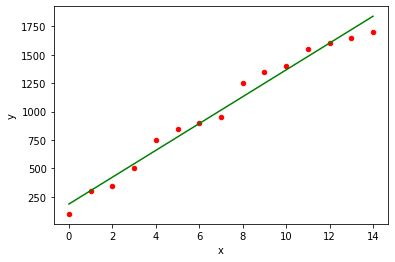

In [4]:
#Defining the main() function to provide dataset and calling above-defined functions

def main(): 
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10, 11, 12, 13, 14])
    y = np.array([100, 300, 350, 500, 750, 850, 900,950, 1250, 1350, 1400, 1550, 1600, 1650,1700])

    b = coef_estimation(x, y) 
    print("Estimated coefficients:\nreg_b_0 = {} \nreg_b_1 = {}".format(b[0],b[1]))  
    plot_regression_line(x, y, b) 
  
if __name__ == "__main__": 
        main()


##### Simple Linear Regression-Example 2

In [5]:
#Importing necessary packages

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline


In [6]:
#Loading the dataset and creating its object

diabetes_data = datasets.load_diabetes()


In [7]:
#Using one feature 

X = diabetes_data.data[:, np.newaxis, 2]


In [8]:
#Splitting the data into training and testing sets

X_train = X[:-35]
X_test = X[-35:]


In [9]:
#Splitting the target into training and testing sets

y_train = diabetes_data.target[:-35]
y_test = diabetes_data.target[-35:]


In [10]:
#Creating linear regression object

SLR_reg = linear_model.LinearRegression()

#Training the model using the training sets
SLR_reg.fit(X_train, y_train)

#Making predictions by using the testing set 
y_pred = SLR_reg.predict(X_test)



In [11]:
# Printing Regeression Coefficient, Mean Squared Error(MSE),Variance Score. Also plotting the regression line and labels on it.
   
print('Coefficients: \n', SLR_reg.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [963.82249207]
Mean squared error: 3487.66
Variance score: 0.26


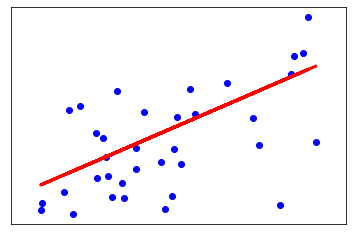

In [12]:
#Plotting the outputs:

plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


##### Multiple Linear Regression

In [13]:
#Importing necessary packages

import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
%matplotlib inline


In [14]:
#Loading the dataset and creating its object

boston_data = datasets.load_boston(return_X_y=False)



In [15]:
#Defining feature matrix X and response vector Y 

X = boston_data.data 
y = boston_data.target


In [16]:
#Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)



In [17]:
#Creating regression object and do the training of the model

MLR_reg = linear_model.LinearRegression() 
  
MLR_reg.fit(X_train, y_train) 
  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficients: 
 [-7.95572889e-02  7.11808367e-02  5.82382970e-02  1.48237233e+00
 -1.67360287e+01  2.95000985e+00  2.33290549e-02 -1.35721280e+00
  3.13822151e-01 -1.16929875e-02 -8.07436236e-01  6.67075368e-03
 -6.71019667e-01]
Variance score: 0.7325323805669589


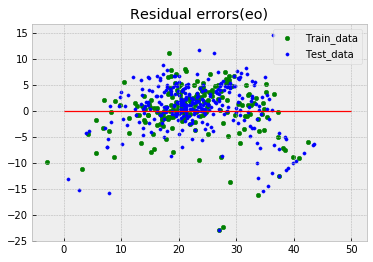

In [18]:
# Printing Regeression Coefficient, and Variance Score. Also plotting the regression line and labels on it.

print('Coefficients: \n', MLR_reg.coef_) 
  
print('Variance score: {}'.format(MLR_reg.score(X_test, y_test))) 
  
plt.style.use('bmh') 
  
plt.scatter(MLR_reg.predict(X_train), MLR_reg.predict(X_train) - y_train, 
            color = "green", s = 20, label = 'Train_data') 
  
plt.scatter(MLR_reg.predict(X_test), MLR_reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test_data') 
  
plt.hlines(y = 0, xmin = 0, xmax = 50, color = 'red', linewidth = 1.25) 
plt.legend(loc = 'upper right') 
plt.title("Residual errors(eo)") 
plt.show()


##### Logistic Regression 

In [19]:
#Importing necessary packages

%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt


In [20]:
#Downloading the digit dataset

from sklearn.datasets import load_digits
digits_dataset = load_digits()


In [21]:
# Printing total images and labels in the dataset 
print(digits_dataset.data.shape)
print(digits_dataset.target.shape)


(1797, 64)
(1797,)


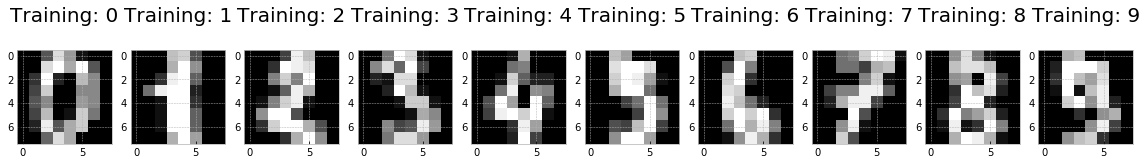

In [24]:
#Let’s have a look at the training data
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits_dataset.data[0:10], digits_dataset.target[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)


In [26]:
#Splitting the dataset into training and testing data set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits_dataset.data, digits_dataset.target, test_size=0.30, random_state=0) #70% data for Training and 30% Data for Testing


In [27]:
#Import the LogisticRegression class from sklearn and use the fit method to train the model

from sklearn.linear_model import LogisticRegression
logRegression = LogisticRegression()
logRegression.fit(x_train, y_train)


C:\Users\Leekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Leekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
#Predicting for images 
logRegression.predict(x_test[0].reshape(1,-1))

logRegression.predict(x_test[0:10])

y_pred = logRegression.predict(x_test)



In [29]:
#Calculating performance metrics (Confusion matrix, Classification Report and Accuracy) of our decision tree classifier. 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Confusion Matrix:-\n', confusion_matrix(y_test, y_pred))
print('Classification Report:-\n', classification_report(y_test, y_pred))
print('Accuracy:-\n',accuracy_score(y_test,y_pred))


Confusion Matrix:-
 [[45  0  0  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  2  0  3  0]
 [ 0  0 51  2  0  0  0  0  0  0]
 [ 0  0  1 52  0  0  0  0  0  1]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  1  0  0  0 55  1  0  0  0]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  1  0  1  1  0  0 50  0  0]
 [ 0  3  1  0  0  0  0  0 55  2]
 [ 0  0  0  1  0  1  0  0  2 53]]
Classification Report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.89      0.90      0.90        52
           2       0.96      0.96      0.96        53
           3       0.93      0.96      0.95        54
           4       0.98      1.00      0.99        48
           5       0.98      0.96      0.97        57
           6       0.95      0.98      0.97        60
           7       1.00      0.94      0.97        53
           8       0.92      0.90      0.91        61
           9       0.95      0.93      0.94        57

    accuracy                

##### Decision Tree Algorithm

In [30]:
#Importing necessary packages

import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split


In [31]:
#Download the Pima-Indiands-Diabetes dataset and read it using Pandas as follows:

Data_column_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
Dataset_pima_diabetes = pd.read_csv(r"C:\Users\Leekha\Desktop\pima-indians-diabetes.csv", header=None, names= Data_column_names)


In [32]:
#With the help of following script, you can look at the dataset 

Dataset_pima_diabetes.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
#Splitting the dataset in fetaures and target variables

feature_columns = ['pregnant', 'insulin','bmi', 'age','glucose','bp','pedigree','skin']

# Features

X = Dataset_pima_diabetes[feature_columns] 

# Target variable

y = Dataset_pima_diabetes.label 

#Splitting the dataset for training and testing purpose. Here we are splitting the dataset into 80% training data and 20% of testing data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

#Train the model. We are using DecisionTreeClassifier() class of Scikit-learn

DT_classifier = DecisionTreeClassifier()
DT_classifier = DT_classifier.fit(X_train,y_train)

#Make predictions from trained model

y_pred = DT_classifier.predict(X_test)


In [34]:
#Calculating performance metrics (Confusion matrix, Classification Report and Accuracy) of our decision tree classifier. 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Confusion Matrix:-\n', confusion_matrix(y_test, y_pred))
print('Classification Report:-\n', classification_report(y_test, y_pred))
print('Accuracy:-\n',accuracy_score(y_test,y_pred))


Confusion Matrix:-
 [[81 18]
 [26 29]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.76      0.82      0.79        99
           1       0.62      0.53      0.57        55

    accuracy                           0.71       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.71      0.71       154

Accuracy:-
 0.7142857142857143


In [35]:
#Visualizing our decision tree
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(DT_classifier,out_file=None,feature_names=feature_columns,class_names=True)
graph = graphviz.Source(dot_data)
graph.render("DTVisualize",view=True)


'DTVisualize.pdf'

##### Random Forest

In [36]:
#Importing necessary packages

import pandas as pd
from sklearn.model_selection import train_test_split


In [37]:
#Download the Pima-Indiands-Diabetes dataset and read it using Pandas as follows:

Data_column_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
Dataset_pima_diabetes = pd.read_csv(r"C:\Users\Leekha\Desktop\pima-indians-diabetes.csv", header=None, names= Data_column_names)


In [38]:
#Splitting the dataset in fetaures and target variables

feature_columns = ['pregnant', 'insulin','bmi', 'age','glucose','bp','pedigree','skin']

# Features

X = Dataset_pima_diabetes[feature_columns] 

# Target variable

y = Dataset_pima_diabetes.label 

#Splitting the dataset for training and testing purpose. Here we are splitting the dataset into 80% training data and 20% of testing data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 


In [39]:
#Train the model. We are using RandomForestClassifier() class of Scikit-learn

RF_classifier = DecisionTreeClassifier()
RF_classifier = RF_classifier.fit(X_train,y_train)

#Make predictions from trained model

y_pred = RF_classifier.predict(X_test)


In [40]:
#Calculating performance metrics (Confusion matrix, Classification Report and Accuracy) of our decision tree classifier. 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Confusion Matrix:-\n', confusion_matrix(y_test, y_pred))
print('Classification Report:-\n', classification_report(y_test, y_pred))
print('Accuracy:-\n',accuracy_score(y_test,y_pred))



Confusion Matrix:-
 [[79 20]
 [25 30]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.76      0.80      0.78        99
           1       0.60      0.55      0.57        55

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154

Accuracy:-
 0.7077922077922078


##### Naive Bayes Algorithm

In [41]:
#Importing necessary packages

from sklearn import preprocessing #LabelEncoder
from sklearn.naive_bayes import GaussianNB #Gaussian Naive Bayes model


In [42]:
#Assigning features and label variables to the columns of our dataset:

weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Mild','Cool','Mild','Mild','Mild']
play=['N','N','Y','Y','N','N','Y','Y','Y','Y','Y']


In [43]:
#Creating Label Encoder
Lbl_encoder = preprocessing.LabelEncoder()

# Convert string labels into numbers.
encode_weatherdata= Lbl_encoder.fit_transform(weather)
encode_temperaturedata= Lbl_encoder.fit_transform(temp)
encode_labeldata= Lbl_encoder.fit_transform(play)


In [45]:
# Printing encoded data
print ("Encoded Weather Data is:", encode_weatherdata)
print ("Encoded Temperature Data is:", encode_temperaturedata)
print ("Encoded Label Data is:", encode_labeldata)


Encoded Weather Data is: [2 2 0 1 1 0 2 2 1 0 1]
Encoded Temperature Data is: [1 1 1 2 0 0 2 0 2 2 2]
Encoded Label Data is: [0 0 1 1 0 0 1 1 1 1 1]


In [47]:
# Combining both the features in a single list of tuples
combn_features=tuple(zip(encode_weatherdata, encode_temperaturedata))
print ("Combined features in a single list of tuples:", combn_features)

#Generating a Gaussian Classifier
NB_model = GaussianNB()

# Training our model
NB_model.fit(combn_features, encode_labeldata)


Combined features in a single list of tuples: ((2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (0, 2), (1, 2))


GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
#Predicting the Output
predicted= NB_model.predict([[1,0]]) # 1:-Rainy, 0:-Cool
print ("Predicted Value:", predicted)


Predicted Value: [0]


##### Multi Class Classification uisng Naive Bayes Algorithm

In [49]:
#Importing necessary packages 
from sklearn import datasets # scikit-learn dataset library
from sklearn.model_selection import train_test_split # train_test_split function
from sklearn.naive_bayes import GaussianNB #Gaussian Naive Bayes model


In [50]:
#Loading iris-flower dataset
iris_flower = datasets.load_iris()


In [51]:
# Printing the names of the features
print ("Features: ", iris_flower.feature_names)

# Printing the label type of flowers
print ("Labels: ", iris_flower.target_names)

# Printing data shape
iris_flower.data.shape


Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']


(150, 4)

In [52]:
# Printing the iris-flower data features (top 10 records)
print (iris_flower.data[0:10])


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [53]:
# Printing the iris-flower labels (0:setosa, 1:versicolor, 2:virginica)
print (iris_flower.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [54]:
# Splitting iris-dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(iris_flower.data, iris_flower.target, test_size=0.3,random_state=115) # 70% data for training and 30% data for testing purpose


In [55]:
#Generating a Gaussian Classifier
NB_iris = GaussianNB()

#Training the classifier model using the training sets
NB_iris.fit(X_train, y_train)

#Predicting the response for testing dataset
y_pred = NB_iris.predict(X_test)

#Importing the scikit-learn metrics module for calculating the accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9333333333333333


##### Support Vector Machine (SVM)

In [56]:
#Importing necessary packages 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()


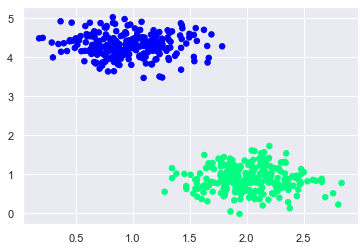

In [57]:
#Generating sample dataset having linearly separable data
from sklearn.datasets.samples_generator import make_blobs
X_data, y_data = make_blobs(n_samples=500, centers=2,
                  random_state=0, cluster_std=0.30)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=30, cmap='winter'); 


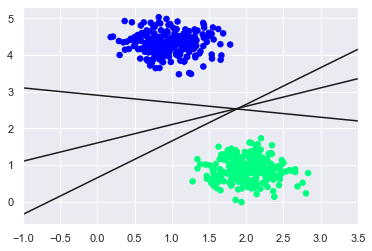

In [58]:
# Implementing discriminative classification i.e. Dividing the classes from each other 
xfit = np.linspace(-1, 3.5)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=30, cmap='winter')
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);


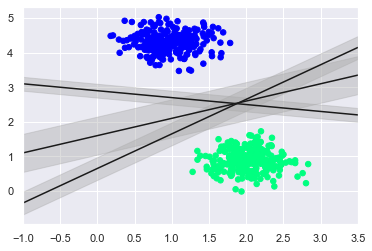

In [59]:
# In order to find MMH, drawing a margin of some width, up to the nearest point, around each line.  
xfit = np.linspace(-1, 3.5)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=30, cmap='winter')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5); 


In [60]:
#Training the algorithm. Calling fit method of SVC class 
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear')
model.fit(X_data, y_data)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

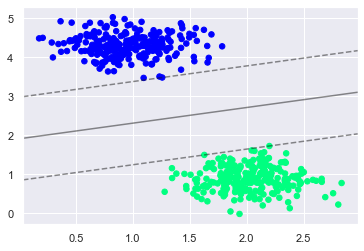

In [61]:
#Plotting the decision function for 2-dimesional SVC

def decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=400, linewidth=2, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim) 

plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=30, cmap='winter')
decision_function(model);


In [62]:
# Getting the support vectors points
model.support_vectors_


array([[1.2591839 , 3.48188418],
       [1.62869156, 1.49705048],
       [2.19960206, 1.72547019]])

##### Kernel SVM

In [63]:
#Importing necessary packages 
from sklearn import datasets # scikit-learn dataset library
from sklearn.model_selection import train_test_split # train_test_split function


In [64]:
#Loading iris-flower dataset
iris_flower = datasets.load_iris()


In [65]:
# Printing the names of the features
print ("Features: ", iris_flower.feature_names)

# Printing the label type of flowers
print ("Labels: ", iris_flower.target_names)

# Printing data shape
iris_flower.data.shape

# Printing the iris-flower data features (top 10 records)
print (iris_flower.data[0:10])

# Printing the iris-flower labels (0:setosa, 1:versicolor, 2:virginica)
print (iris_flower.target)


Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [66]:
# Splitting iris-dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(iris_flower.data, iris_flower.target, test_size=0.3,random_state=115) # 70% data for training and 30% data for testing purpose


In [67]:
# Training the algorithm by using SVC class fit method. Here we are using Polynomial kernel.

from sklearn.svm import SVC
svm_K_classifier = SVC(kernel='poly', degree=8)
svm_K_classifier.fit(X_train, y_train)

#Predicting the response for testing dataset
y_pred = svm_K_classifier.predict(X_test)



C:\Users\Leekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [68]:
# Importing the scikit-learn classification_report and confusion_matrix module for evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix:\n', confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))


Confusion Matrix:
 [[18  0  0]
 [ 0 10  0]
 [ 0  3 14]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.77      1.00      0.87        10
           2       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45



In [69]:
# Training the algorithm by using SVC class fit method. Here we are using rbf kernel.

from sklearn.svm import SVC
svm_K_classifier = SVC(kernel='rbf')
svm_K_classifier.fit(X_train, y_train)

#Predicting the response for testing dataset
y_pred = svm_K_classifier.predict(X_test)

# Importing the scikit-learn classification_report and confusion_matrix module for evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix:\n', confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))


Confusion Matrix:
 [[18  0  0]
 [ 0 10  0]
 [ 0  2 15]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.83      1.00      0.91        10
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



C:\Users\Leekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [70]:
# Training the algorithm by using SVC class fit method. Here we are using sigmoid kernel.

from sklearn.svm import SVC
svm_K_classifier = SVC(kernel='sigmoid')
svm_K_classifier.fit(X_train, y_train)

#Predicting the response for testing dataset
y_pred = svm_K_classifier.predict(X_test)

# Importing the scikit-learn classification_report and confusion_matrix module for evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix:\n', confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))


Confusion Matrix:
 [[ 0 18  0]
 [ 0 10  0]
 [ 0 17  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.22      1.00      0.36        10
           2       0.00      0.00      0.00        17

    accuracy                           0.22        45
   macro avg       0.07      0.33      0.12        45
weighted avg       0.05      0.22      0.08        45



C:\Users\Leekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Leekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### k-Nearest Neighbor (KNN) Classifier

In [71]:
#Importing necessary packages 
import numpy as np  
import pandas as pd  


In [77]:
#Downloading the Iris-flower dataset
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'


In [78]:
# Assigning column names to the dataset
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Reading dataset to Pandas dataframes
iris_data = pd.read_csv(path, names= column_names)

# Data preprocessing
X = iris_data.iloc[:, :-1].values  
y = iris_data.iloc[:, 4].values


In [79]:
# Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 75% data for training and 25% data for testing purpose


In [80]:
# Data scaling for sending scaled data to the train the model
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)


In [81]:
# Training the algorithm by using KNeighborsClassifier class fit method. 

from sklearn.neighbors import KNeighborsClassifier  
Knn_classifier = KNeighborsClassifier(n_neighbors=8)  
Knn_classifier.fit(X_train, y_train)  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [82]:
#Predicting the response for testing dataset
y_pred = Knn_classifier.predict(X_test)


In [83]:
# Importing the scikit-learn classification_report and confusion_matrix module for evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix:\n', confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))


Confusion Matrix:
 [[ 9  0  0]
 [ 0 13  2]
 [ 0  0 14]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.95        38
      macro avg       0.96      0.96      0.95        38
   weighted avg       0.95      0.95      0.95        38



##### k-Nearest Neighbor (KNN) Regressor

In [84]:
#Importing necessary packages, handling dataset 
import numpy as np
from sklearn.datasets import load_iris
iris_data = load_iris()
X = iris_data.data[:, :4]  
y = iris_data.target
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)


In [85]:
#This is the only change i.e. we need to import KNeighborRegressor class and train the model 
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  
knn_regressor.fit(X_train, y_train)

# Printing the Mean Square Error
print ("The MSE is:",format(np.power(y-knn_regressor.predict(X),4).mean()))


The MSE is: 5.629984


##### K-Means Clustering

In [86]:
#Importing necessary packages 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  
import numpy as np
from sklearn.cluster import KMeans


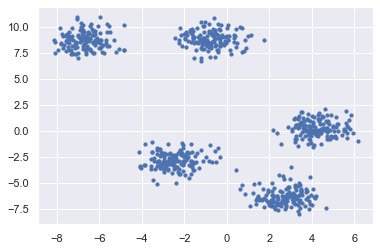

In [87]:
#Generating 2-dimensional dataset having 5 blobs 

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=700, centers=5, cluster_std=0.8)

#Let’s visualize our dataset
plt.scatter(X[:, 0], X[:, 1], s=10);
plt.show()


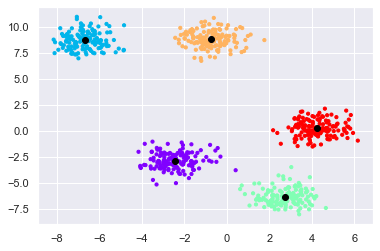

In [88]:
#Creating an object of k-means and providing number of clusters
kmeans = KMeans(n_clusters=5)

#Train the model by using fit method of k-means() class
kmeans.fit(X)

# do the predictions
y_kmeans = kmeans.predict(X)

# Plotting and visualizing cluster’s centers picked by k-means estimators

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black');
plt.show()
